<a href="https://colab.research.google.com/github/ShahJalal-Jamil/Textile-Research/blob/main/Top_5_features_data_Textile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step-1:** DataSet Import and Preprocessing

In [7]:
# Dataset load and Pre-processing
!git clone https://github.com/ShahJalal-Jamil/Textile-Research.git
import pandas as pd

df = pd.read_excel(r'/content/Textile-Research/data_textile with_top 5 Features.xlsx')
df = df.replace('Jersey', 0, regex=True)
df = df.replace('DLacoste', 1, regex=True)
df = df.replace('Fleece', 2, regex=True)
df = df.replace('Lacoste', 3, regex=True)
df = df.replace('Pique', 4, regex=True)
df = df.replace('Plain', 5, regex=True)
df = df.replace('RDenim', 6, regex=True)
df = df.replace('SDenim', 7, regex=True)
df = df.replace('Twill', 8, regex=True)
print (df)

fatal: destination path 'Textile-Research' already exists and is not an empty directory.
       MS    FT  GSM    T_S     El  Class (Y/N)
0    3500  0.18  160   4.75  15.00            1
1    3800  0.21  160   5.15  15.00            1
2    3600  0.22  160   5.15  15.00            0
3    3500  0.22  160   5.15  17.00            0
4    3500  0.21  160   5.15  15.00            0
..    ...   ...  ...    ...    ...          ...
995  3000  0.62  310  11.95  26.48            0
996  2800  0.62  310  10.89  26.48            0
997  3000  0.62  310  12.31  26.11            1
998  2500  0.62  310  11.70  26.48            0
999  2800  0.62  310  11.98  24.11            0

[1000 rows x 6 columns]


In [13]:
# Data Normalization
c = df.columns
for i in range(0,len(c)):
    if i!= 5:
        column_name = c[i]
        print(column_name)
        l = df[column_name].unique()
        #print (l)
        print(l.size)
        max_value = max(l)
        for j in range(0,l.size):
            df[column_name] = df[column_name].replace(l[j], l[j]/max_value)

MS
11
FT
27
GSM
66
T_S
287
El
86


In [27]:
# Data Assigning into X and Y for Traning and Testing
# X = df.drop('target', axis=1)  # Features
# y = df['target']  # Target variable


X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
print(X_new.shape)
print(X_new)

(1000, 5)
(1000,)
(1000, 5)
[[0.875      0.225      0.50632911 0.33928571 0.56646526]
 [0.95       0.2625     0.50632911 0.36785714 0.56646526]
 [0.9        0.275      0.50632911 0.36785714 0.56646526]
 ...
 [0.75       0.775      0.98101266 0.87928571 0.98602719]
 [0.625      0.775      0.98101266 0.83571429 1.        ]
 [0.7        0.775      0.98101266 0.85571429 0.91049849]]


**Step2:** Applying Decion Tree Classifier along with K-fold Cross Validation and Reuslts

In [29]:
# Decion Tree and Results with cross validation

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state= 42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = dt_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)



Metrics (Fold 21):
Accuracy: 0.7900
Precision: 0.8195
Recall: 0.8583
F1 Score: 0.8385
Confusion Matrix:
[[ 49  24]
 [ 18 109]]

Metrics (Fold 41):
Accuracy: 0.7800
Precision: 0.8492
Recall: 0.8106
F1 Score: 0.8295
Confusion Matrix:
[[ 49  19]
 [ 25 107]]

Metrics (Fold 61):
Accuracy: 0.8150
Precision: 0.9016
Recall: 0.8148
F1 Score: 0.8560
Confusion Matrix:
[[ 53  12]
 [ 25 110]]

Metrics (Fold 81):
Accuracy: 0.7850
Precision: 0.8268
Recall: 0.8333
F1 Score: 0.8300
Confusion Matrix:
[[ 52  22]
 [ 21 105]]

Metrics (Fold 101):
Accuracy: 0.7750
Precision: 0.8043
Recall: 0.8605
F1 Score: 0.8315
Confusion Matrix:
[[ 44  27]
 [ 18 111]]

Overall Metrics:
Overall Accuracy: 0.7890
Overall Precision: 0.8390
Overall Recall: 0.8351
Overall F1 Score: 0.8371

Overall Confusion Matrix:
[[247 104]
 [107 542]]


In [30]:
# Decion Tree and Results with LEAVE ONE OUT Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Assigning into X and Y for Traning and Testing
# X = df.drop('target', axis=1)  # Features
# y = df['target']  # Target variable

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = dt_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 6)
(1000,)

Overall Metrics:
Overall Accuracy: 1.0000
Overall Precision: 1.0000
Overall Recall: 1.0000
Overall F1 Score: 1.0000

Overall Confusion Matrix:
[[351   0]
 [  0 649]]


2. Naibe Bayes Classifier along with K-fold Cross Validation and Reuslts

In [34]:
# Decion Tree and Results with k-fold Cross Validation Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = nb_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Metrics (Fold 21):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 36  37]
 [ 16 111]]

Metrics (Fold 41):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 26  42]
 [ 15 117]]

Metrics (Fold 61):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 26  39]
 [ 16 119]]

Metrics (Fold 81):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 43  31]
 [ 20 106]]

Metrics (Fold 101):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[ 25  46]
 [ 21 108]]

Overall Metrics:
Overall Accuracy: 0.7170
Overall Precision: 0.7421
Overall Recall: 0.8644
Overall F1 Score: 0.7986

Overall Confusion Matrix:
[[156 195]
 [ 88 561]]


In [35]:
# Naive Bayes and Results with LEAVE ONE OUT Method

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Naive Bayes Classifier
nb_classifier = GaussianNB()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = nb_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Overall Metrics:
Overall Accuracy: 0.7170
Overall Precision: 0.7414
Overall Recall: 0.8659
Overall F1 Score: 0.7989

Overall Confusion Matrix:
[[155 196]
 [ 87 562]]


3. K-Nearest Neighbor along with Cross Validation and Results

In [37]:
# .......K-NN k-fold Cross Validation Method and Results.................

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize K-Nearest Neighbors Classifier with k=3 (we can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Metrics (Fold 11):
Accuracy: 0.8000
Precision: 0.8356
Recall: 0.8841
F1 Score: 0.8592
Confusion Matrix:
[[19 12]
 [ 8 61]]

Metrics (Fold 21):
Accuracy: 0.8800
Precision: 0.8966
Recall: 0.8966
F1 Score: 0.8966
Confusion Matrix:
[[36  6]
 [ 6 52]]

Metrics (Fold 31):
Accuracy: 0.8300
Precision: 0.9138
Recall: 0.8154
F1 Score: 0.8618
Confusion Matrix:
[[30  5]
 [12 53]]

Metrics (Fold 41):
Accuracy: 0.8000
Precision: 0.8406
Recall: 0.8657
F1 Score: 0.8529
Confusion Matrix:
[[22 11]
 [ 9 58]]

Metrics (Fold 51):
Accuracy: 0.8300
Precision: 0.9077
Recall: 0.8429
F1 Score: 0.8741
Confusion Matrix:
[[24  6]
 [11 59]]

Metrics (Fold 61):
Accuracy: 0.7800
Precision: 0.8209
Recall: 0.8462
F1 Score: 0.8333
Confusion Matrix:
[[23 12]
 [10 55]]

Metrics (Fold 71):
Accuracy: 0.8200
Precision: 0.8710
Recall: 0.8438
F1 Score: 0.8571
Confusion Matrix:
[[28  8]
 [10 54]]

Metrics (Fold 81):
Accuracy: 0.8200
Precision: 0.8548
Recall: 0.8548
F1 Score: 0.8548
Confusion Matrix:
[[29  9]


In [38]:
# .........K-NN along with Leave-One-Out Method and Results............


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize K-Nearest Neighbors Classifier with k=3 (you can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8140
Overall Precision: 0.8578
Overall Recall: 0.8552
Overall F1 Score: 0.8565

Overall Confusion Matrix:
[[259  92]
 [ 94 555]]


4. Schotasting Gradient Descent algorithm along with Validation and Results

In [42]:
# .........Schotasting Gradient Descent with K-fold Method and Results............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    sgd_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = sgd_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'huber', 'hinge', 'squared_hinge', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'perceptron', 'log_loss', 'squared_error'}. Got 'log' instead.

In [43]:
# .........Schotasting Gradient Descent with Leave One Out CV and Results......

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    sgd_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = sgd_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'huber', 'hinge', 'squared_hinge', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'perceptron', 'log_loss', 'squared_error'}. Got 'log' instead.

5. Random Forest along With Validation and Results

In [47]:
#...........Random Forest with k-fold cross Validation and Results...........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = rf_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Metrics (Fold 21):
Accuracy: 0.8100
Precision: 0.8296
Recall: 0.8819
F1 Score: 0.8550
Confusion Matrix:
[[ 50  23]
 [ 15 112]]

Metrics (Fold 41):
Accuracy: 0.8350
Precision: 0.8837
Recall: 0.8636
F1 Score: 0.8736
Confusion Matrix:
[[ 53  15]
 [ 18 114]]

Metrics (Fold 61):
Accuracy: 0.8450
Precision: 0.9062
Recall: 0.8593
F1 Score: 0.8821
Confusion Matrix:
[[ 53  12]
 [ 19 116]]

Metrics (Fold 81):
Accuracy: 0.8300
Precision: 0.8651
Recall: 0.8651
F1 Score: 0.8651
Confusion Matrix:
[[ 57  17]
 [ 17 109]]

Metrics (Fold 101):
Accuracy: 0.7800
Precision: 0.8102
Recall: 0.8605
F1 Score: 0.8346
Confusion Matrix:
[[ 45  26]
 [ 18 111]]

Overall Metrics:
Overall Accuracy: 0.8200
Overall Precision: 0.8580
Overall Recall: 0.8659
Overall F1 Score: 0.8620

Overall Confusion Matrix:
[[258  93]
 [ 87 562]]


In [49]:
#...........Random Forest with Leave One Out Validation and Results...........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)


# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = rf_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Overall Metrics:
Overall Accuracy: 0.8190
Overall Precision: 0.8556
Overall Recall: 0.8675
Overall F1 Score: 0.8615

Overall Confusion Matrix:
[[256  95]
 [ 86 563]]


6. Support Vector Machine along with Validation and Results

In [50]:
#.............SVM with K-fold Cross Validation and Results............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = svm_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Metrics (Fold 11):
Accuracy: 0.7500
Precision: 0.7750
Recall: 0.8986
F1 Score: 0.8322
Confusion Matrix:
[[13 18]
 [ 7 62]]

Metrics (Fold 21):
Accuracy: 0.7300
Precision: 0.7123
Recall: 0.8966
F1 Score: 0.7939
Confusion Matrix:
[[21 21]
 [ 6 52]]

Metrics (Fold 31):
Accuracy: 0.7300
Precision: 0.7436
Recall: 0.8923
F1 Score: 0.8112
Confusion Matrix:
[[15 20]
 [ 7 58]]

Metrics (Fold 41):
Accuracy: 0.7300
Precision: 0.7326
Recall: 0.9403
F1 Score: 0.8235
Confusion Matrix:
[[10 23]
 [ 4 63]]

Metrics (Fold 51):
Accuracy: 0.7300
Precision: 0.7590
Recall: 0.9000
F1 Score: 0.8235
Confusion Matrix:
[[10 20]
 [ 7 63]]

Metrics (Fold 61):
Accuracy: 0.7500
Precision: 0.7500
Recall: 0.9231
F1 Score: 0.8276
Confusion Matrix:
[[15 20]
 [ 5 60]]

Metrics (Fold 71):
Accuracy: 0.7700
Precision: 0.7887
Recall: 0.8750
F1 Score: 0.8296
Confusion Matrix:
[[21 15]
 [ 8 56]]

Metrics (Fold 81):
Accuracy: 0.6800
Precision: 0.7083
Recall: 0.8226
F1 Score: 0.7612
Confusion Matrix:
[[17 21]


In [51]:
#.............SVM with Leave-One-Out Method and Results.............

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = svm_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)

Overall Metrics:
Overall Accuracy: 0.7260
Overall Precision: 0.7382
Overall Recall: 0.8952
Overall F1 Score: 0.8092

Overall Confusion Matrix:
[[145 206]
 [ 68 581]]


7. Artificial Neural Network along with Cross Validation and Results

(1000, 5)
(1000,)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 11):
Accuracy: 0.7700
Precision: 0.8286
Recall: 0.8406
F1 Score: 0.8345
Confusion Matrix:
[[19 12]
 [11 58]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 21):
Accuracy: 0.8100
Precision: 0.8000
Recall: 0.8966
F1 Score: 0.8455
Confusion Matrix:
[[29 13]
 [ 6 52]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 31):
Accuracy: 0.8300
Precision: 0.8636
Recall: 0.8769
F1 Score: 0.8702
Confusion Matrix:
[[26  9]
 [ 8 57]]

Metrics (Fold 41):
Accuracy: 0.7400
Precision: 0.7733
Recall: 0.8657
F1 Score: 0.8169
Confusion Matrix:
[[16 17]
 [ 9 58]]

Metrics (Fold 51):
Accuracy: 0.8800
Precision: 0.8919
Recall: 0.9429
F1 Score: 0.9167
Confusion Matrix:
[[22  8]
 [ 4 66]]

Metrics (Fold 61):
Accuracy: 0.8300
Precision: 0.8429
Recall: 0.9077
F1 Score: 0.8741
Confusion Matrix:
[[24 11]
 [ 6 59]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 71):
Accuracy: 0.8300
Precision: 0.8730
Recall: 0.8594
F1 Score: 0.8661
Confusion Matrix:
[[28  8]
 [ 9 55]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 81):
Accuracy: 0.7600
Precision: 0.8065
Recall: 0.8065
F1 Score: 0.8065
Confusion Matrix:
[[26 12]
 [12 50]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Metrics (Fold 91):
Accuracy: 0.7400
Precision: 0.7105
Recall: 0.9310
F1 Score: 0.8060
Confusion Matrix:
[[20 22]
 [ 4 54]]

Metrics (Fold 101):
Accuracy: 0.8200
Precision: 0.8533
Recall: 0.9014
F1 Score: 0.8767
Confusion Matrix:
[[18 11]
 [ 7 64]]

Overall Metrics:
Overall Accuracy: 0.8010
Overall Precision: 0.8233
Overall Recall: 0.8829
Overall F1 Score: 0.8520

Overall Confusion Matrix:
[[228 123]
 [ 76 573]]


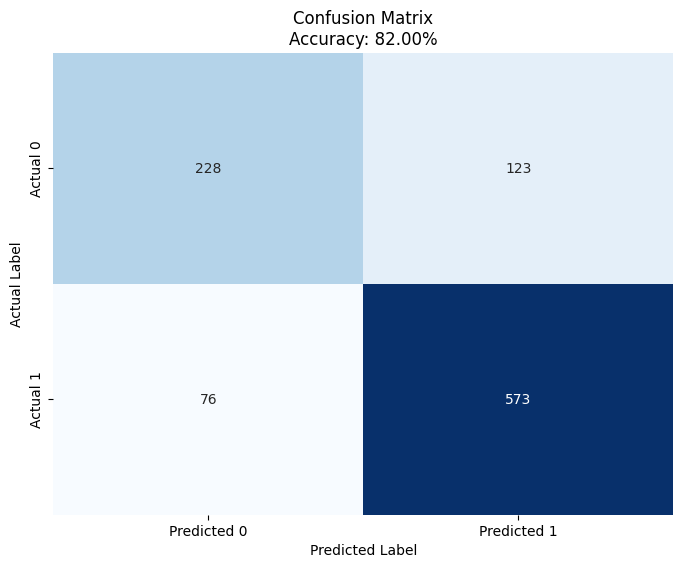

In [52]:
#..........ANN with k-fold cross validation and Results..........

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize Artificial Neural Network Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    ann_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ann_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Set labels and title
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()



In [ ]:
#...........ANN with Leave one Out Method and Results

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize Artificial Neural Network Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    ann_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ann_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


(1000, 5)
(1000,)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

8. AdaBoost Classifier along with Cross Validation and Results

In [ ]:
# ........AdaBoost Classier with k-fold Cross Validation and Results......

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    adaboost_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = adaboost_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


In [ ]:
#...........AdaBoos Classifier with Leave one oUt Method and Results.........
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate Data for impleentation purposes
X = df.iloc[:,:5]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Initialize AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    adaboost_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = adaboost_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

# Calculate overall metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


8. Ensemble Method with K-fold Cross Validation

(1000, 10)
(1000,)

Metrics (Fold 11):
Accuracy: 0.8100
Precision: 0.8289
Recall: 0.9130
F1 Score: 0.8690
Confusion Matrix:
[[18 13]
 [ 6 63]]

Metrics (Fold 21):
Accuracy: 0.7800
Precision: 0.7812
Recall: 0.8621
F1 Score: 0.8197
Confusion Matrix:
[[28 14]
 [ 8 50]]

Metrics (Fold 31):
Accuracy: 0.8700
Precision: 0.9062
Recall: 0.8923
F1 Score: 0.8992
Confusion Matrix:
[[29  6]
 [ 7 58]]

Metrics (Fold 41):
Accuracy: 0.8000
Precision: 0.8507
Recall: 0.8507
F1 Score: 0.8507
Confusion Matrix:
[[23 10]
 [10 57]]

Metrics (Fold 51):
Accuracy: 0.9200
Precision: 0.9189
Recall: 0.9714
F1 Score: 0.9444
Confusion Matrix:
[[24  6]
 [ 2 68]]

Metrics (Fold 61):
Accuracy: 0.8300
Precision: 0.8243
Recall: 0.9385
F1 Score: 0.8777
Confusion Matrix:
[[22 13]
 [ 4 61]]

Metrics (Fold 71):
Accuracy: 0.8600
Precision: 0.9310
Recall: 0.8438
F1 Score: 0.8852
Confusion Matrix:
[[32  4]
 [10 54]]

Metrics (Fold 81):
Accuracy: 0.7700
Precision: 0.7826
Recall: 0.8710
F1 Score: 0.8244
Confusion Matrix:
[[23 15]

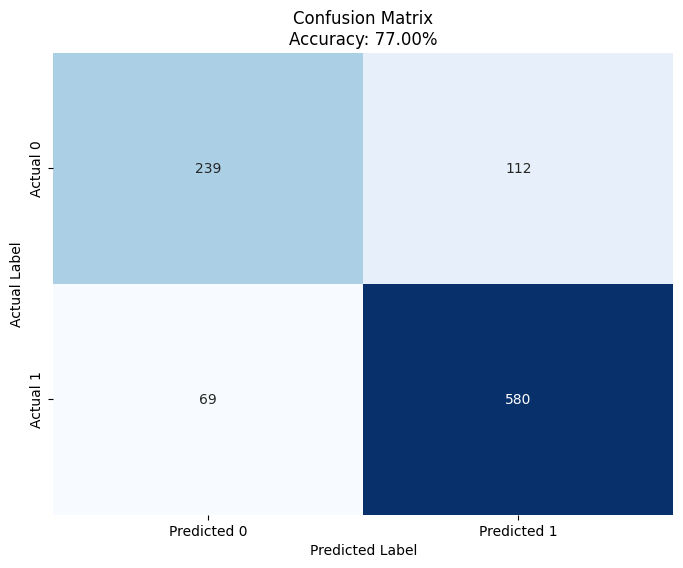

In [ ]:
#...........Ensemble with K-fold Cross Validation and Results

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Define base classifiers for the ensemble
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
sgd_classifier = SGDClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a majority voting ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('ann', ann_classifier),
        #('dt', dt_classifier),
        ('svm', svm_classifier),
        ('nb', nb_classifier),
        ('knn', knn_classifier),
        ('sgd', sgd_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'
)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the ensemble model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ensemble_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each fold
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each fold
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics (Fold {len(all_predictions)//10 + 1}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)



# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(overall_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

# Set labels and title
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()





In [ ]:
#........Ensemble method with K-fold cross Validation and Results..........

import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Generate Data for impleentation purposes
X = df.iloc[:,:10]
#print (X)
X = X.to_numpy()
print(X.shape)
y = df['Class (Y/N)']
#print (y)
y = y.to_numpy()
print(y.shape)
X_new = X
#print(X_new.shape)
#print(X_new)

# Define base classifiers for the ensemble
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
sgd_classifier = SGDClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a majority voting ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('ann', ann_classifier),
        ('dt', dt_classifier),
        ('svm', svm_classifier),
        ('nb', nb_classifier),
        ('knn', knn_classifier),
        ('sgd', sgd_classifier),
        ('rf', rf_classifier)
    ],
    voting='hard'
)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Initialize variables to store overall metrics
all_predictions = []
all_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the ensemble model on the training data
    ensemble_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = ensemble_classifier.predict(X_test)

    # Append predictions and labels to the overall lists
    all_predictions.extend(predictions)
    all_labels.extend(y_test)

    # Calculate metrics for each iteration
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Calculate confusion matrix for each iteration
    confusion_mat = confusion_matrix(y_test, predictions)

    # Print metrics and confusion matrix for each iteration
    print(f"\nMetrics (Iteration {len(all_predictions)}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(confusion_mat)

# Calculate the overall metrics
overall_accuracy = accuracy_score(all_labels, all_predictions)
overall_precision = precision_score(all_labels, all_predictions)
overall_recall = recall_score(all_labels, all_predictions)
overall_f1 = f1_score(all_labels, all_predictions)

# Calculate the overall confusion matrix
overall_confusion_matrix = confusion_matrix(all_labels, all_predictions)

# Print overall metrics and confusion matrix
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1 Score: {overall_f1:.4f}")
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)


NameError: ignored